# CHECKPOINT 01 – Data Science e Machine Learning

**Notebook de resolução**

Este notebook contém a resolução dos exercícios solicitados para o dataset *Individual Household Electric Power Consumption* e para o *Appliances energy prediction dataset*. Cada exercício está numerado conforme o enunciado entregue.


In [78]:
!pip install -U scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline


## Parte 1 - Individual Household Electric Power Consumption

**Observação:** o dataset está disponível em: https://archive.ics.uci.edu/dataset/235/individual+household+electric+power+consumption

O arquivo original é um `.txt` com separador `;` e utiliza `?` para valores ausentes. Abaixo está o código para carregar o dataset.


**Utilizar:**
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00360/household_power_consumption.txt"

df = pd.read_csv(url, sep=';', na_values='?', low_memory=False)

In [44]:


DATA_URL = "household_power_consumption.txt"


df = pd.read_csv(DATA_URL, sep=';', na_values='?', low_memory=False)


### 1. Exiba as 10 primeiras linhas

In [45]:
df.head(10)

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
5,16/12/2006,17:29:00,3.520,0.522,235.02,15.0,0.0,2.0,17.0
6,16/12/2006,17:30:00,3.702,0.520,235.09,15.8,0.0,1.0,17.0
7,16/12/2006,17:31:00,3.700,0.520,235.22,15.8,0.0,1.0,17.0
8,16/12/2006,17:32:00,3.668,0.510,233.99,15.8,0.0,1.0,17.0
9,16/12/2006,17:33:00,3.662,0.510,233.86,15.8,0.0,2.0,16.0


### 2. Diferença entre Global_active_power e Global_reactive_power

**Resposta (explicação):**

- `Global_active_power`: potência ativa total consumida pela residência (kW) — representa a energia que é efetivamente convertida em trabalho (aquecimento, movimento, luz).
- `Global_reactive_power`: potência reativa total (kVAr) — energia que alterna entre a fonte e cargas reativas (indutivas/capacitor), não convertida em trabalho, mas necessária para manter campos elétricos/magnéticos.


### 3. Verificar valores ausentes (contagem)

In [40]:
df.isna().sum()

,0
Date,0
Time,0
Global_active_power,25979
Global_reactive_power,25979
Voltage,25979
Global_intensity,25979
Sub_metering_1,25979
Sub_metering_2,25979
Sub_metering_3,25979


### 4. Converter coluna Date para datetime e criar coluna weekday

In [46]:
# Garantir que a coluna Date seja datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['weekday'] = df['Date'].dt.day_name()
df['datetime'] = pd.to_datetime(df['Date'].dt.strftime('%Y-%m-%d') + ' ' + df['Time'])

# Visualizar
print(df[['Date', 'Time', 'weekday', 'datetime']].head())

        Date      Time   weekday            datetime
0 2006-12-16  17:24:00  Saturday 2006-12-16 17:24:00
1 2006-12-16  17:25:00  Saturday 2006-12-16 17:25:00
2 2006-12-16  17:26:00  Saturday 2006-12-16 17:26:00
3 2006-12-16  17:27:00  Saturday 2006-12-16 17:27:00
4 2006-12-16  17:28:00  Saturday 2006-12-16 17:28:00


### 5. Filtrar registros apenas de 2007 e média de consumo diário de Global_active_power

In [47]:

df_2007 = df[df['Date'].dt.year == 2007].copy()
df_2007['datetime'] = pd.to_datetime(df_2007['Date'].dt.strftime('%Y-%m-%d') + ' ' + df_2007['Time'])
daily_mean_2007 = df_2007.resample('D', on='datetime')['Global_active_power'].mean()
daily_mean_2007.head(), daily_mean_2007.mean()


(datetime
 2007-01-01    1.909031
 2007-01-02    0.881414
 2007-01-03    0.704204
 2007-01-04    2.263481
 2007-01-05    1.884281
 Freq: D, Name: Global_active_power, dtype: float64,
 np.float64(1.116143014214133))

### 6. Gráfico de linha mostrando variação de Global_active_power em um único dia

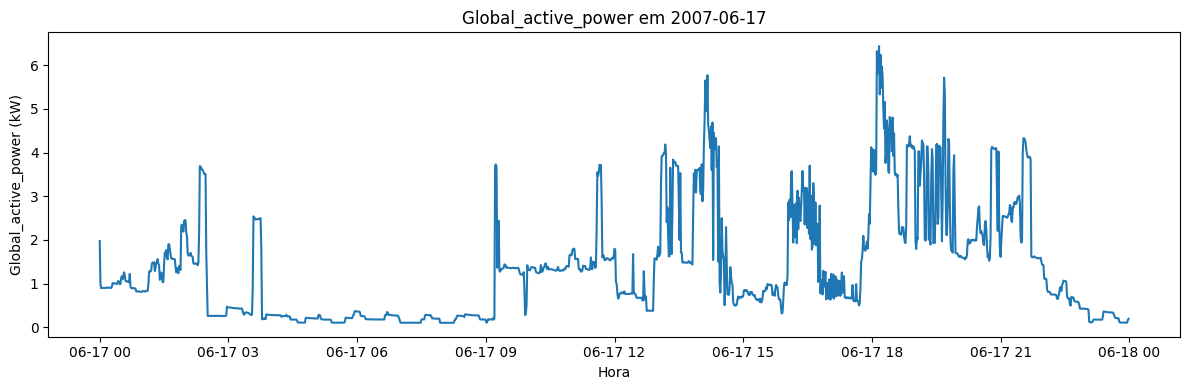

In [48]:

# Escolha um dia com dados disponíveis, por exemplo 2007-06-17
day = '2007-06-17'
mask = df['Date'] == pd.to_datetime(day)
day_df = df.loc[mask].copy()

# Criar datetime
day_df['datetime'] = pd.to_datetime(day_df['Date'].dt.strftime('%Y-%m-%d') + ' ' + day_df['Time'])
plt.figure(figsize=(12,4))
plt.plot(day_df['datetime'], day_df['Global_active_power'])
plt.title(f'Global_active_power em {day}')
plt.xlabel('Hora')
plt.ylabel('Global_active_power (kW)')
plt.tight_layout()


### 7. Histograma da variável Voltage

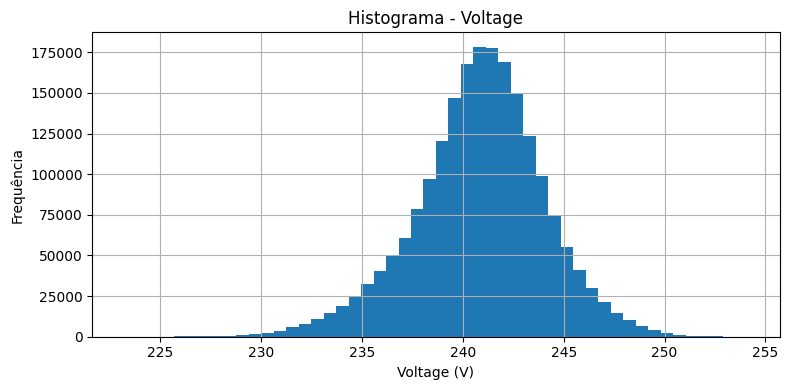

In [49]:

plt.figure(figsize=(8,4))
df['Voltage'].hist(bins=50)
plt.title('Histograma - Voltage')
plt.xlabel('Voltage (V)')
plt.ylabel('Frequência')
plt.tight_layout()


### 8. Consumo médio por mês no período disponível

In [50]:

# Criar datetime completo e index
df['datetime'] = pd.to_datetime(df['Date'].dt.strftime('%Y-%m-%d') + ' ' + df['Time'])
monthly_mean = df.resample('M', on='datetime')['Global_active_power'].mean()
monthly_mean.head()


,Global_active_power
datetime,
2006-12-31,1.901295
2007-01-31,1.546034
2007-02-28,1.401084
2007-03-31,1.318627
2007-04-30,0.891189


### 9. Identificar o dia com maior consumo de Global_active_power

In [51]:

daily_sum = df.resample('D', on='datetime')['Global_active_power'].sum()
highest_day = (daily_sum.idxmax(), daily_sum.max())
highest_day


(Timestamp('2006-12-23 00:00:00'), 4773.386)

### 10. Consumo médio: dias de semana vs finais de semana

In [52]:

df['is_weekend'] = df['weekday'].isin(['Saturday','Sunday'])
mean_weekday = df.loc[~df['is_weekend'], 'Global_active_power'].mean()
mean_weekend = df.loc[df['is_weekend'], 'Global_active_power'].mean()
mean_weekday, mean_weekend


(np.float64(1.0354720516747498), np.float64(1.2342321767913047))

### 11. Correlação entre variáveis selecionadas

In [53]:
df[['Global_active_power','Global_reactive_power','Voltage','Global_intensity']].corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity
Global_active_power,1.000000,0.247017,-0.399762,0.998889
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120
Voltage,-0.399762,-0.112246,1.000000,-0.411363
Global_intensity,0.998889,0.266120,-0.411363,1.000000


### 12. Criar variável Total_Sub_metering (soma das três submeterings)

In [54]:
df['Total_Sub_metering'] = df[['Sub_metering_1','Sub_metering_2','Sub_metering_3']].sum(axis=1)
df['Total_Sub_metering'].head()

,Total_Sub_metering
0,18.0
1,17.0
2,19.0
3,18.0
4,18.0


### 13. Verificar meses onde Total_Sub_metering ultrapassa a média de Global_active_power

In [55]:

global_mean = df['Global_active_power'].mean()
monthly_total_sub = df.resample('M', on='datetime')['Total_Sub_metering'].sum()
monthly_total_sub[monthly_total_sub > global_mean]


,Total_Sub_metering
datetime,
2006-12-31,239123.0
2007-01-31,465285.0
2007-02-28,382462.0
2007-03-31,455892.0
2007-04-30,269998.0
2007-05-31,377317.0
2007-06-30,318462.0
2007-07-31,253600.0
2007-08-31,311404.0


### 14. Série temporal do Voltage para o ano de 2008

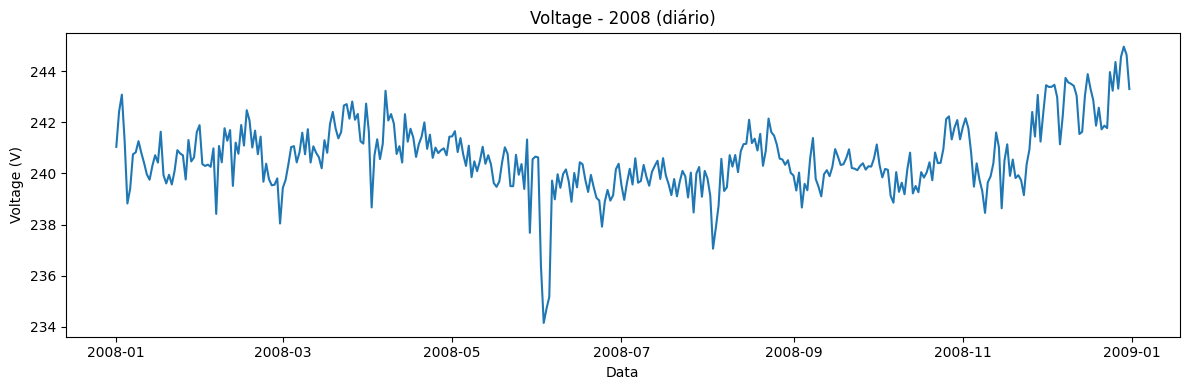

In [56]:

voltage_2008 = df[df['Date'].dt.year==2008].resample('D', on='datetime')['Voltage'].mean()
plt.figure(figsize=(12,4))
plt.plot(voltage_2008.index, voltage_2008.values)
plt.title('Voltage - 2008 (diário)')
plt.xlabel('Data')
plt.ylabel('Voltage (V)')
plt.tight_layout()


### 15. Comparação consumo entre meses de verão e inverno (hemisfério norte)

Verão (NH): junho, julho, agosto. Inverno (NH): dezembro, janeiro, fevereiro.

In [57]:

summer_months = [6,7,8]
winter_months = [12,1,2]
df['month'] = df['Date'].dt.month
mean_summer = df[df['month'].isin(summer_months)]['Global_active_power'].mean()
mean_winter = df[df['month'].isin(winter_months)]['Global_active_power'].mean()
mean_summer, mean_winter


(np.float64(0.7266815219278782), np.float64(1.4176230462106605))

### 16. Amostragem aleatória de 1% e comparação de distribuição de Global_active_power

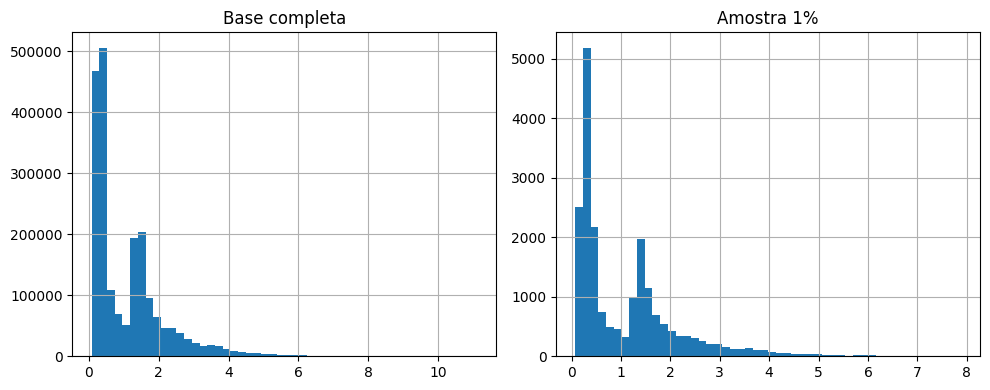

In [58]:

sample = df.sample(frac=0.01, random_state=42)
plt.figure(figsize=(10,4))
plt.subplot(1,2,1); df['Global_active_power'].hist(bins=50); plt.title('Base completa')
plt.subplot(1,2,2); sample['Global_active_power'].hist(bins=50); plt.title('Amostra 1%')
plt.tight_layout()


### 17. Normalização (Min-Max Scaling) das principais variáveis numéricas

In [59]:

cols = ['Global_active_power','Global_reactive_power','Voltage','Global_intensity','Total_Sub_metering']
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[cols] = scaler.fit_transform(df_scaled[cols].fillna(0))
df_scaled[cols].describe().T


,count,mean,std,min,25%,50%,75%,max
Global_active_power,2075259.0,0.096920,0.095095,0.0,0.027333,0.051969,0.136666,1.0
Global_reactive_power,2075259.0,0.087889,0.081191,0.0,0.033094,0.071942,0.138129,1.0
Voltage,2075259.0,0.935766,0.106119,0.0,0.939957,0.948102,0.955577,1.0
Global_intensity,2075259.0,0.094418,0.091867,0.0,0.028926,0.053719,0.132231,1.0
Total_Sub_metering,2075259.0,0.065431,0.095674,0.0,0.000000,0.007463,0.134328,1.0


### 18. K-means: segmentar os dias em 3 grupos distintos de consumo elétrico

In [60]:

daily = df.resample('D', on='datetime')[['Global_active_power','Global_reactive_power','Voltage','Global_intensity','Total_Sub_metering']].mean().dropna()
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(daily)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
daily['cluster'] = kmeans.labels_
daily.groupby('cluster').mean()


,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Total_Sub_metering
cluster,,,,,
0,0.686898,0.132856,239.949684,2.980312,5.498211
1,1.146635,0.109890,241.471538,4.827738,9.178387
2,1.677612,0.140071,240.928215,7.069511,13.854003


### 19. Decomposição série temporal (6 meses) para Global_active_power

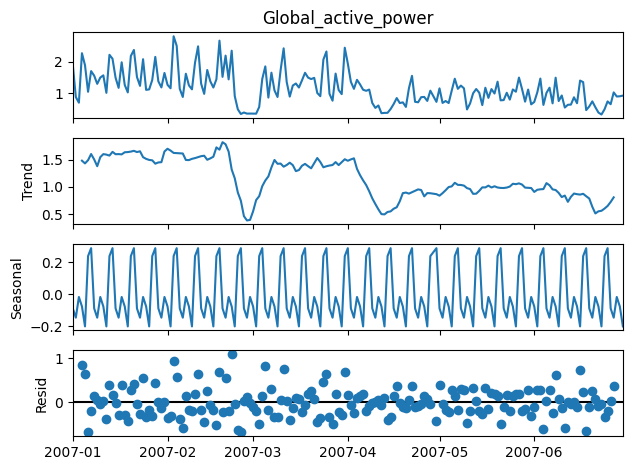

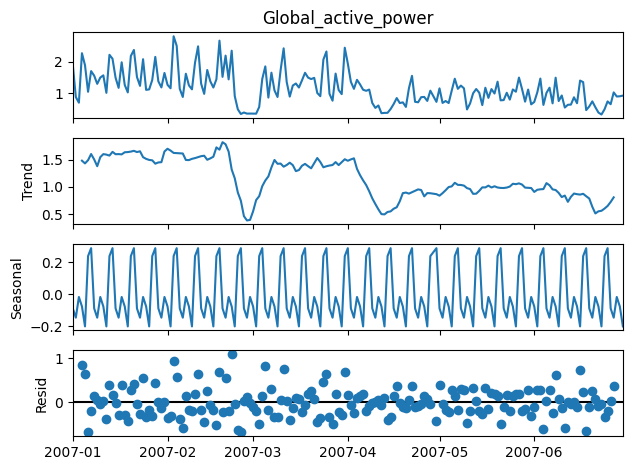

In [61]:

mask = (df['Date'] >= '2007-01-01') & (df['Date'] <= '2007-06-30')
ts = df.loc[mask].resample('D', on='datetime')['Global_active_power'].mean().dropna()
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(ts, model='additive', period=7)
decomp.plot()


### 20. Regressão linear simples: prever Global_active_power a partir de Global_intensity

In [62]:

X = df[['Global_intensity']].dropna()
y = df.loc[X.index, 'Global_active_power']

model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)

print('Coef:', model.coef_, 'Intercept:', model.intercept_, 'RMSE:', rmse)


Coef: [0.23762937] Intercept: -0.008076494382778465 RMSE: 0.0498339346935975


## Parte 2 - Exercícios adicionais

### 21. Séries temporais por hora

In [63]:

# Converter Date+Time para datetime index e reamostrar por hora
df_dt = df.copy()
df_dt['datetime'] = pd.to_datetime(df_dt['Date'].dt.strftime('%Y-%m-%d') + ' ' + df_dt['Time'])
df_dt.set_index('datetime', inplace=True)
hourly = df_dt['Global_active_power'].resample('H').mean()

# Horários de maior consumo médio ao longo do dia (agregando por hora do dia)
hour_of_day = hourly.groupby(hourly.index.hour).mean().sort_values(ascending=False)
hour_of_day.head(10)


,Global_active_power
datetime,
20,1.899073
21,1.876063
19,1.733428
7,1.502373
8,1.460940
22,1.412681
9,1.331642
18,1.326433
10,1.260913


### 22. Autocorrelação do consumo (lags 1h, 24h, 48h)

In [64]:

series = hourly.dropna()
autocorr_1h = series.autocorr(lag=1)
autocorr_24h = series.autocorr(lag=24)
autocorr_48h = series.autocorr(lag=48)
autocorr_1h, autocorr_24h, autocorr_48h


(np.float64(0.713343387922962),
 np.float64(0.4351862386607033),
 np.float64(0.3990179423908085))

### 23. Redução de dimensionalidade com PCA (2 componentes)

In [65]:

pca_df = df[['Global_active_power','Global_reactive_power','Voltage','Global_intensity']].dropna()
sc = StandardScaler().fit_transform(pca_df)
pca = PCA(n_components=2).fit(sc)
pcs = pca.transform(sc)
print('Explained variance ratios:', pca.explained_variance_ratio_)


Explained variance ratios: [0.59103759 0.22718543]


### 24. Visualização de clusters no espaço PCA (K-Means 3 clusters)

In [68]:

kmeans = KMeans(n_clusters=3, random_state=42).fit(pcs)
plt.figure(figsize=(8,6))
plt.scatter(pcs[:,0], pcs[:,1], c=kmeans.labels_, alpha=0.3)
plt.xlabel('PC1'); plt.ylabel('PC2'); plt.title('PCA + KMeans (3 clusters)')


Text(0.5, 1.0, 'PCA + KMeans (3 clusters)')

Error in callback <function flush_figures at 0x7f731915ba60> (for post_execute):


KeyboardInterrupt: 

### 25. Regressão polinomial vs linear (Voltage -> Global_active_power)

Linear -> RMSE: 0.969135832624744 Coef: [-0.13045289] Intercept: 32.50986978212233
Polinomial grau 2 -> RMSE: 0.9648154069545043 Coef: [ 0.         -2.71698952  0.00538165] Intercept: 343.238035382487


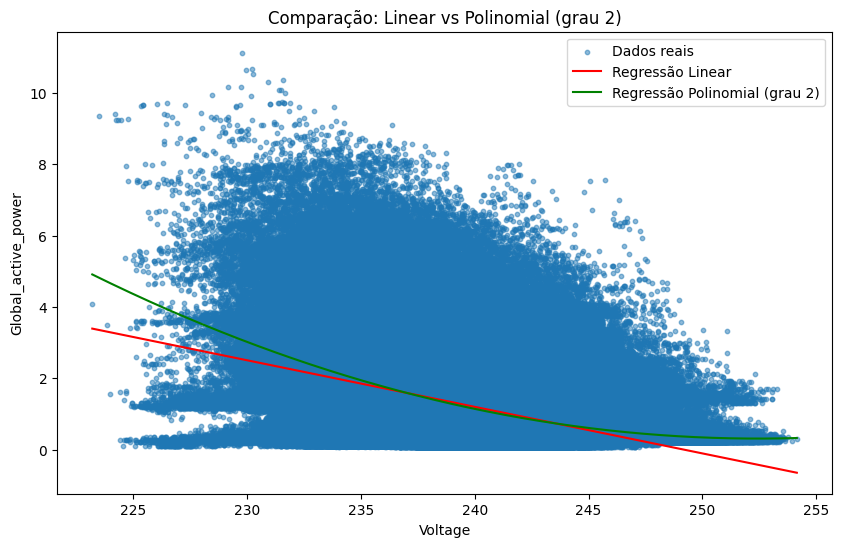

In [69]:
# Filtrabdo dados válidos
mask = df[['Voltage','Global_active_power']].dropna().index
Xv = df.loc[mask,'Voltage'].values.reshape(-1,1)
yv = df.loc[mask,'Global_active_power'].values


# Regressão Linear
lin = LinearRegression().fit(Xv, yv)
pred_lin = lin.predict(Xv)


# Regressão Polinomial grau 2
poly = PolynomialFeatures(degree=2)
Xv2 = poly.fit_transform(Xv)
lin2 = LinearRegression().fit(Xv2, yv)
pred_poly = lin2.predict(Xv2)


# RMSE (versão compatível)
rmse_lin = np.sqrt(mean_squared_error(yv, pred_lin))
rmse_poly = np.sqrt(mean_squared_error(yv, pred_poly))

print("Linear -> RMSE:", rmse_lin, "Coef:", lin.coef_, "Intercept:", lin.intercept_)
print("Polinomial grau 2 -> RMSE:", rmse_poly, "Coef:", lin2.coef_, "Intercept:", lin2.intercept_)


# Visualização
plt.figure(figsize=(10,6))
plt.scatter(Xv, yv, s=10, label="Dados reais", alpha=0.5)

# Ordena para gráfico bonito
sort_idx = np.argsort(Xv.flatten())
plt.plot(Xv[sort_idx], pred_lin[sort_idx], color="red", label="Regressão Linear")
plt.plot(Xv[sort_idx], pred_poly[sort_idx], color="green", label="Regressão Polinomial (grau 2)")

plt.xlabel("Voltage")
plt.ylabel("Global_active_power")
plt.legend()
plt.title("Comparação: Linear vs Polinomial (grau 2)")
plt.show()

## Parte 3 - Appliances Energy Prediction

Dataset: https://archive.ics.uci.edu/dataset/374/appliances+energy+prediction

Os códigos abaixo carregam e exploram o dataset.

In [70]:

APPL_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv"

appl = pd.read_csv(APPL_URL)
appl.info()
appl.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

,count,mean,std,min,25%,50%,75%,max
Appliances,19735.0,97.694958,102.524891,10.000000,50.000000,60.000000,100.000000,1080.000000
lights,19735.0,3.801875,7.935988,0.000000,0.000000,0.000000,0.000000,70.000000
T1,19735.0,21.686571,1.606066,16.790000,20.760000,21.600000,22.600000,26.260000
RH_1,19735.0,40.259739,3.979299,27.023333,37.333333,39.656667,43.066667,63.360000
T2,19735.0,20.341219,2.192974,16.100000,18.790000,20.000000,21.500000,29.856667
RH_2,19735.0,40.420420,4.069813,20.463333,37.900000,40.500000,43.260000,56.026667
T3,19735.0,22.267611,2.006111,17.200000,20.790000,22.100000,23.290000,29.236000
RH_3,19735.0,39.242500,3.254576,28.766667,36.900000,38.530000,41.760000,50.163333
T4,19735.0,20.855335,2.042884,15.100000,19.530000,20.666667,22.100000,26.200000
RH_4,19735.0,39.026904,4.341321,27.660000,35.530000,38.400000,42.156667,51.090000


### 27. Distribuição do consumo (Appliances)

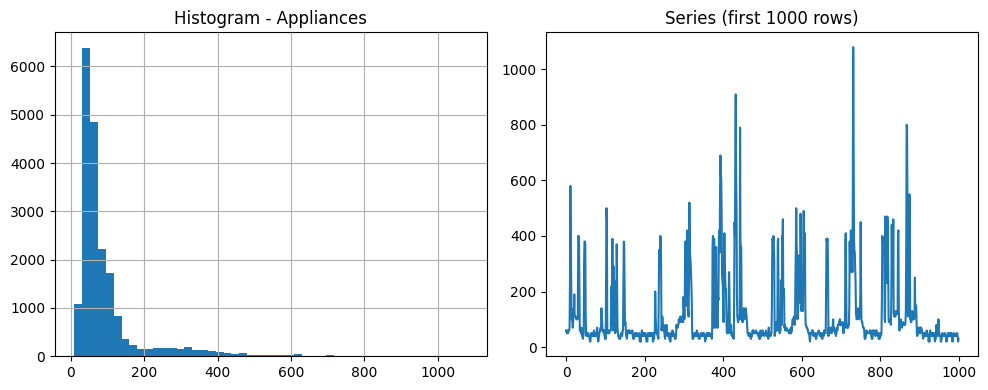

In [71]:

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
appl['Appliances'].hist(bins=50)
plt.title('Histogram - Appliances')
plt.subplot(1,2,2)
appl['Appliances'].iloc[:1000].plot()
plt.title('Series (first 1000 rows)')
plt.tight_layout()


### 28. Correlações entre Appliances e variáveis ambientais

In [72]:

cols_env = [c for c in ['T1','RH_1','T2','RH_2','T3','RH_3','T4','RH_4','T_out','Press_mm_hg'] if c in appl.columns]
corrs = appl[['Appliances'] + cols_env].corr()['Appliances'].sort_values(ascending=False)
corrs


,Appliances
Appliances,1.000000
T2,0.120073
T_out,0.099155
RH_1,0.086031
T3,0.085060
T1,0.055447
T4,0.040281
RH_3,0.036292
RH_4,0.016965
Press_mm_hg,-0.034885


### 29. Normalização dos dados (Min-Max)

In [73]:

num_cols = appl.select_dtypes(include=[np.number]).columns.tolist()
scaler = MinMaxScaler()
appl_scaled = appl.copy()
appl_scaled[num_cols] = scaler.fit_transform(appl_scaled[num_cols])
appl_scaled[num_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
Appliances,19735.0,0.081958,0.095818,0.0,0.037383,0.046729,0.084112,1.0
lights,19735.0,0.054312,0.113371,0.0,0.000000,0.000000,0.000000,1.0
T1,19735.0,0.517061,0.169595,0.0,0.419219,0.507920,0.613516,1.0
RH_1,19735.0,0.364271,0.109512,0.0,0.283735,0.347675,0.441519,1.0
T2,19735.0,0.308303,0.159412,0.0,0.195542,0.283499,0.392537,1.0
RH_2,19735.0,0.561170,0.114438,0.0,0.490299,0.563408,0.641016,1.0
T3,19735.0,0.421038,0.166676,0.0,0.298272,0.407112,0.505982,1.0
RH_3,19735.0,0.489601,0.152107,0.0,0.380122,0.456302,0.607260,1.0
T4,19735.0,0.518499,0.184044,0.0,0.399099,0.501502,0.630631,1.0
RH_4,19735.0,0.485143,0.185289,0.0,0.335894,0.458387,0.618722,1.0


### 30. PCA no dataset Appliances (2 componentes)

Explained variance ratios (appliances dataset): [0.36426881 0.21103941]


Text(0.5, 1.0, 'PCA - Appliances dataset')

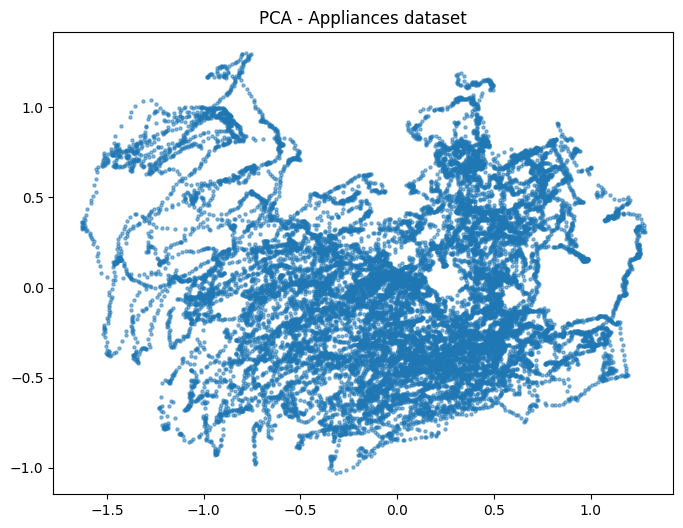

In [74]:

X_app = appl_scaled.select_dtypes(include=[np.number]).drop(columns=['Appliances'], errors='ignore').dropna()
pca = PCA(n_components=2)
pcs_app = pca.fit_transform(X_app)
print('Explained variance ratios (appliances dataset):', pca.explained_variance_ratio_)
plt.figure(figsize=(8,6))
plt.scatter(pcs_app[:,0], pcs_app[:,1], s=5, alpha=0.5)
plt.title('PCA - Appliances dataset')


### 31. Regressão Linear Múltipla

In [75]:



# Seleção de features (garante que só pega as que existem no DataFrame)
features = [c for c in ['T1','RH_1','T2','RH_2','T3','RH_3'] if c in appl.columns]

# Conjunto de treino (X -> preditores, y -> variável resposta)
X = appl[features].dropna()
y = appl.loc[X.index, 'Appliances']

# Treinando modelo de Regressão Linear Múltipla
lr = LinearRegression().fit(X, y)

# Predições
y_pred = lr.predict(X)

# RMSE (compatível com qualquer versão do scikit-learn)
rmse = np.sqrt(mean_squared_error(y, y_pred))

# R² (coeficiente de determinação)
r2 = lr.score(X, y)

# Resultados
print("Coeficientes:", lr.coef_)
print("Intercepto:", lr.intercept_)
print("R²:", r2)
print("RMSE:", rmse)

Coeficientes: [  8.50772699  21.532391   -26.34334707 -21.27809068  14.54140907
  -0.66860445]
Intercepto: 144.66352683132118
R²: 0.08613473308242525
RMSE: 98.00751926156234


### 32. Random Forest Regressor

In [79]:

features = X.columns.tolist()

X_tr, X_te, y_tr, y_te = train_test_split(
    appl[features], appl['Appliances'],
    test_size=0.2, random_state=42
)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_tr, y_tr)

y_pred_rf = rf.predict(X_te)

rmse_rf = np.sqrt(mean_squared_error(y_te, y_pred_rf))

r2_rf = rf.score(X_te, y_te)

print("R² :", r2_rf)
print("RMSE :", rmse_rf)


R² : 0.5040477255155567
RMSE : 70.44884377385686


### 33. K-Means clustering (3-5 clusters)

In [80]:

from sklearn.metrics import silhouette_score
Xclus = X_app.copy()
for k in [3,4,5]:
    km = KMeans(n_clusters=k, random_state=42).fit(Xclus)
    print('k=',k,' inertia=',km.inertia_, ' silhouette=', silhouette_score(Xclus, km.labels_))


k= 3  inertia= 12069.73238457596  silhouette= 0.19901043064915577
k= 4  inertia= 10900.73282526969  silhouette= 0.170950659095239
k= 5  inertia= 9746.888807738944  silhouette= 0.1778719529842031


### 34. Classificação binária (alto vs baixo consumo)

In [81]:

appl['high_consumption'] = (appl['Appliances'] > appl['Appliances'].median()).astype(int)
# Features reuse (fillna if necessary)
Xc = appl[features].fillna(0)
yc = appl['high_consumption']
X_tr, X_te, y_tr, y_te = train_test_split(Xc, yc, test_size=0.25, random_state=42)
log = LogisticRegression(max_iter=1000).fit(X_tr, y_tr)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42).fit(X_tr, y_tr)
pred_log = log.predict(X_te)
pred_rf = rf_clf.predict(X_te)


### 35. Avaliação de classificação

In [82]:

from sklearn.metrics import classification_report, confusion_matrix
print('Logistic Regression:\n', classification_report(y_te, pred_log))
print('Random Forest:\n', classification_report(y_te, pred_rf))
print('Confusion Matrix (RF):\n', confusion_matrix(y_te, pred_rf))


Logistic Regression:
               precision    recall  f1-score   support

           0       0.65      0.78      0.71      2677
           1       0.66      0.50      0.57      2257

    accuracy                           0.65      4934
   macro avg       0.65      0.64      0.64      4934
weighted avg       0.65      0.65      0.64      4934

Random Forest:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90      2677
           1       0.88      0.88      0.88      2257

    accuracy                           0.89      4934
   macro avg       0.89      0.89      0.89      4934
weighted avg       0.89      0.89      0.89      4934

Confusion Matrix (RF):
 [[2418  259]
 [ 272 1985]]


## Observações finais

- Este notebook foi estruturado para ser didático e para ser executado passo a passo.
- Para executar corretamente, baixe os datasets (ou permita acesso à internet no Jupyter) e ajuste os caminhos `DATA_URL` e `APPL_URL` caso salve localmente.
- Arquivo requirements.txt acompanha este repositório para instalação de dependências.
